In [1]:
#installing pymysql
pip install pymysql

  Obtaining dependency information for pymysql from https://files.pythonhosted.org/packages/e5/30/20467e39523d0cfc2b6227902d3687a16364307260c75e6a1cb4422b0c62/PyMySQL-1.1.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/44.8 kB ? eta -:--:--
   --------- ------------------------------ 10.2/44.8 kB ? eta -:--:--
   ------------------ --------------------- 20.5/44.8 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 44.8/44.8 kB 367.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing all the necessary libraries to work on the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql

In [6]:
#making an api connection to the sql database, so that it can be accessed through jupiter notebook
conn = pymysql.connect(host ='localhost',
                           user ='root',
                           password ='321654987..',
                           database ='miniproject'
                           )

In [9]:
#loading the database into the pandas dataframe
query = "select * from crime_data"
df = pd.read_sql(query, conn)
df.head()

C:\Users\Venkatesh\AppData\Local\Temp\ipykernel_2388\1804606722.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


In [10]:
#displaying and understanding the different components and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DR_NO        499 non-null    int64  
 1   Date_Rptd    499 non-null    object 
 2   DATE_OCC     499 non-null    object 
 3   AREA_NAME    499 non-null    object 
 4   Crm_Cd       499 non-null    int64  
 5   Crm_Cd_Desc  499 non-null    object 
 6   Vict_Age     499 non-null    int64  
 7   Vict_Sex     499 non-null    object 
 8   Premis_Desc  499 non-null    object 
 9   Status       499 non-null    object 
 10  Location     499 non-null    object 
 11  LAT          499 non-null    float64
 12  LON          499 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 50.8+ KB


In [12]:
#checking for null values
df.isnull().sum()

DR_NO          0
Date_Rptd      0
DATE_OCC       0
AREA_NAME      0
Crm_Cd         0
Crm_Cd_Desc    0
Vict_Age       0
Vict_Sex       0
Premis_Desc    0
Status         0
Location       0
LAT            0
LON            0
dtype: int64

In [13]:
#Displaying the statistical information of the numerical values of the dataset
df.describe()

,DR_NO,Crm_Cd,Vict_Age,LAT,LON
count,4.990000e+02,499.000000,499.000000,499.000000,499.000000
mean,1.999930e+08,504.178357,32.142285,34.047335,-118.261283
std,8.742243e+06,198.381863,20.202136,0.053840,0.041560
min,1.030447e+07,210.000000,0.000000,33.710000,-118.560000
25%,2.001044e+08,330.000000,23.000000,34.040000,-118.260000
50%,2.001048e+08,442.000000,31.000000,34.050000,-118.250000
75%,2.001064e+08,624.000000,46.500000,34.050000,-118.240000
max,2.220130e+08,956.000000,78.000000,34.280000,-118.190000


In [15]:
#Displaying the statistical information of all values in the dataset
df.describe(include = "all")

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
count,4.990000e+02,499,499,499,499.000000,499,499.000000,499,499,499,499,499.000000,499.000000
unique,NaN,68,61,19,NaN,42,NaN,4,67,4,365,NaN,NaN
top,NaN,01-11-2020,01-11-2020,Central,NaN,BURGLARY FROM VEHICLE,NaN,M,STREET,IC,800 N ALAMEDA ST,NaN,NaN
freq,NaN,42,38,423,NaN,82,NaN,278,105,447,14,NaN,NaN
mean,1.999930e+08,NaN,NaN,NaN,504.178357,NaN,32.142285,NaN,NaN,NaN,NaN,34.047335,-118.261283
std,8.742243e+06,NaN,NaN,NaN,198.381863,NaN,20.202136,NaN,NaN,NaN,NaN,0.053840,0.041560
min,1.030447e+07,NaN,NaN,NaN,210.000000,NaN,0.000000,NaN,NaN,NaN,NaN,33.710000,-118.560000
25%,2.001044e+08,NaN,NaN,NaN,330.000000,NaN,23.000000,NaN,NaN,NaN,NaN,34.040000,-118.260000
50%,2.001048e+08,NaN,NaN,NaN,442.000000,NaN,31.000000,NaN,NaN,NaN,NaN,34.050000,-118.250000
75%,2.001064e+08,NaN,NaN,NaN,624.000000,NaN,46.500000,NaN,NaN,NaN,NaN,34.050000,-118.240000


In [16]:
#Finding the total number of unique values in each column
df.nunique()

DR_NO          499
Date_Rptd       68
DATE_OCC        61
AREA_NAME       19
Crm_Cd          42
Crm_Cd_Desc     42
Vict_Age        66
Vict_Sex         4
Premis_Desc     67
Status           4
Location       365
LAT             35
LON             29
dtype: int64

In [18]:
#Listing the unique crime locations to get a understanding on the data
df['Location'].unique()

array(['1100 W 39TH PL', '700 S HILL ST', '5400 CORTEEN PL',
       '14400 TITUS ST', '700 S FIGUEROA ST', '200 E 6TH ST',
       '700 BERNARD ST', '800 N ALAMEDA ST', '800 S OLIVE ST',
       '700 W 7TH ST', '100 S LOS ANGELES ST', '13600 LEADWELL ST', '8TH',
       'WALL', '800 N BROADWAY', '400 S SPRING ST', '300 W 5TH ST',
       '1800 S MAIN ST', '600 W 7TH ST', '700 ALPINE ST',
       '6200 SYLMAR AV', '100 E 5TH ST', '1200 E 7TH ST',
       '700 S FLOWER ST', '300 E 3RD ST', '1ST', '1200 S GRAND AV',
       '300 S GRAND AV', '600 S CENTRAL AV', '600 N BROADWAY',
       '800 W 7TH ST', '7TH ST', '23400 PRESIDENT AV', '13100 LAKE ST',
       '100 W 1ST ST', '3RD', '6TH', '1600 S HOPE ST',
       '600 S SAN PEDRO ST', '100 W 2ND ST', '4TH', '700 S GRAND AV',
       '5TH', 'PALMETTO', '800 JAMES M WOOD BL', 'GRAND',
       '200 N AVENUE 25', '500 SAN JULIAN ST', '43RD ST',
       '100 PASEO DE LA PLAZA', '500 S SAN PEDRO ST',
       '1300 S LOS ANGELES ST', '800 S FIGUEROA ST', 'JES

In [19]:
#Retrieving the geographical location of crime spots to be used for spatial analysis
df['AREA_NAME'].unique()

array(['Southwest', 'Central', 'N Hollywood', 'Mission', 'Van Nuys',
       'Wilshire', 'Rampart', 'Harbor', 'Pacific', 'Hollenbeck',
       'West LA', 'Northeast', 'Foothill', 'Hollywood', 'West Valley',
       '77th Street', 'Olympic', 'Devonshire', 'Southeast'], dtype=object)

In [28]:
#Finding the number of crimes in each area by grouping them together per area name.
x = df.groupby('AREA_NAME').count().sort_values(by = 'DR_NO', ascending = False)
x['DR_NO']

AREA_NAME
Central        423
Northeast       12
Harbor          12
Rampart          8
Hollywood        6
West LA          5
77th Street      5
Wilshire         5
Hollenbeck       4
Southwest        4
Van Nuys         4
N Hollywood      2
Foothill         2
West Valley      2
Mission          1
Olympic          1
Pacific          1
Southeast        1
Devonshire       1
Name: DR_NO, dtype: int64

In [32]:
#retrieving the list of unique crime codes
df['Crm_Cd'].unique()


array([624, 745, 740, 442, 946, 341, 330, 930, 648, 354, 230, 761, 350,
       310, 480, 623, 440, 510, 210, 900, 888, 420, 886, 421, 647, 940,
       662, 220, 625, 755, 649, 901, 320, 890, 351, 956, 820, 812, 920,
       850, 666, 343], dtype=int64)

In [33]:
#retrieving the total number of unique crime codes
df['Crm_Cd'].nunique()

42

In [37]:
#displaying crime codes together with crime description
df[['Crm_Cd', 'Crm_Cd_Desc']]

,Crm_Cd,Crm_Cd_Desc
0,624,BATTERY - SIMPLE ASSAULT
1,624,BATTERY - SIMPLE ASSAULT
2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
3,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
4,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER)
...,...,...
494,624,BATTERY - SIMPLE ASSAULT
495,624,BATTERY - SIMPLE ASSAULT
496,624,BATTERY - SIMPLE ASSAULT
497,510,VEHICLE - STOLEN


In [72]:
#Concatenating crime code and its respective description into a new column
df['new'] =  df['Crm_Cd'].astype(str)
df['Crm_Cd & Desc'] = df['new'] + ' ' + df['Crm_Cd_Desc']
df['Crm_Cd & Desc']
df.drop(['new'], axis = 1)
pd.Series(df['Crm_Cd & Desc'].unique(), index = range(1,43))

1                          624 BATTERY - SIMPLE ASSAULT
2          745 VANDALISM - MISDEAMEANOR ($399 OR UNDER)
3     740 VANDALISM - FELONY ($400 & OVER, ALL CHURC...
4          442 SHOPLIFTING - PETTY THEFT ($950 & UNDER)
5                         946 OTHER MISCELLANEOUS CRIME
6     341 THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOW...
7                             330 BURGLARY FROM VEHICLE
8            930 CRIMINAL THREATS - NO WEAPON DISPLAYED
9                                             648 ARSON
10                                354 THEFT OF IDENTITY
11    230 ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASS...
12                                  761 BRANDISH WEAPON
13                                    350 THEFT, PERSON
14                                         310 BURGLARY
15                                    480 BIKE - STOLEN
16                          623 BATTERY POLICE (SIMPLE)
17               440 THEFT PLAIN - PETTY ($950 & UNDER)
18                                 510 VEHICLE -

In [87]:
#Determining the maximum number of crime in accordance with its code
max_crime = df.groupby(['Crm_Cd_Desc']).count().sort_values(by = 'DR_NO', ascending = False)
max_crime['DR_NO'].head(20)

Crm_Cd_Desc
BURGLARY FROM VEHICLE                                       82
BATTERY - SIMPLE ASSAULT                                    74
THEFT PLAIN - PETTY ($950 & UNDER)                          44
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                    28
VEHICLE - STOLEN                                            28
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    26
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              24
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     23
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    23
TRESPASSING                                                 19
BURGLARY                                                    16
ROBBERY                                                     12
BIKE - STOLEN                                               11
THEFT OF IDENTITY                                           10
THEFT, PERSON                                                9
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UN

In [89]:
#Changing the date date of crime occurence column to datetime format to be used for temporal analysis
df['DATE_OCC'] = pd.to_datetime(df['DATE_OCC'])
df.dtypes

DR_NO                     int64
Date_Rptd                object
DATE_OCC         datetime64[ns]
AREA_NAME                object
Crm_Cd                    int64
Crm_Cd_Desc              object
Vict_Age                  int64
Vict_Sex                 object
Premis_Desc              object
Status                   object
Location                 object
LAT                     float64
LON                     float64
Crm_Cd & Desc            object
new                      object
dtype: object

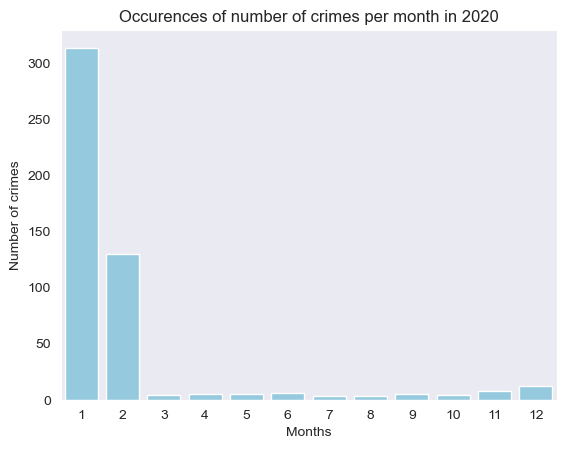

In [146]:
#Plotting the occurences of number of crimes each month in the year 2020
df['DATE_OCC'].unique()
df['month'] = df['DATE_OCC'].dt.month
crime_by_month = df.groupby(['month']).count()

crime_by_month.reset_index(inplace = True)
bar_color = 'skyblue'
sns.barplot(x=crime_by_month['month'], y = crime_by_month['DR_NO'], data = crime_by_month, color=bar_color)
sns.set_style("darkgrid")
plt.xlabel("Months")
plt.ylabel("Number of crimes")
plt.title("Occurences of number of crimes per month in 2020")
plt.show()
# The Graph shows that the crime occurences has exponentially dropped down from the 3rd month. It may be because of the Covid 19
# lockdown that took in place across the entire united states from march till December.

In [147]:
# installing folium to work with the geocoordinates and print a map as output
pip install folium


  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b9/98/9ba4b9d2d07dd32765ddb4e4c189dcbdd7dca4d5a735e2e4ea756f40c36b/folium-0.16.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/17/ce/14166d0e273d12065516625fb02426350298e7b4ba59198b5fe454b46202/branca-0.7.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ----------- --------------------------- 30.7/100.0 kB 146.3 kB/s eta 0:00:01
   --------------------------- ----------- 71.7/100.0 kB 359.3 kB/s eta 0:00:01
   -------------------------------------- 100.0/100.0 kB 442.2 kB/s eta 0:00:00


In [287]:
#importing folium and generating a map with pins on it with respect to the crime locations
import folium
map = folium.Map(location=[df['LAT'].mean(), df['LON'].mean()], zoom_start=10)
for _, row in df.iterrows():
    folium.Marker([row['LAT'], row['LON']]).add_to(map)
map
#as per our previous finding, it is seen that the central region has more number of pins pointed on it.

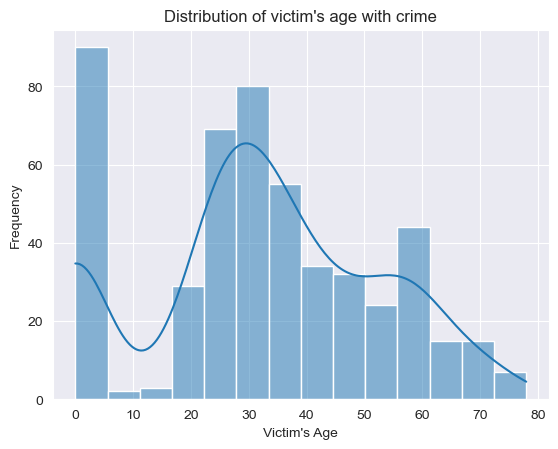

In [177]:
#plotting a histogram to show the distribbution of victim's age with crime occurences
sns.histplot(data = df['Vict_Age'], kde = True)
plt.xlabel("Victim's Age")
plt.ylabel("Frequency")
plt.title("Distribution of victim's age with crime")
plt.show()

In [279]:
#Finding the value counts of each values in victim's age column, since the above graph shows that there
# are more number of victims with "0" age, which is practically not right.
df['Vict_Age'].value_counts().head(20).sort_values(ascending = False)
# Could be an error in data collection process.


Vict_Age
0     90
26    19
35    17
28    16
23    15
30    15
29    14
25    13
57    13
38    13
31    13
32    13
27    12
22    12
24    10
45     9
34     9
55     9
56     9
33     9
Name: count, dtype: int64

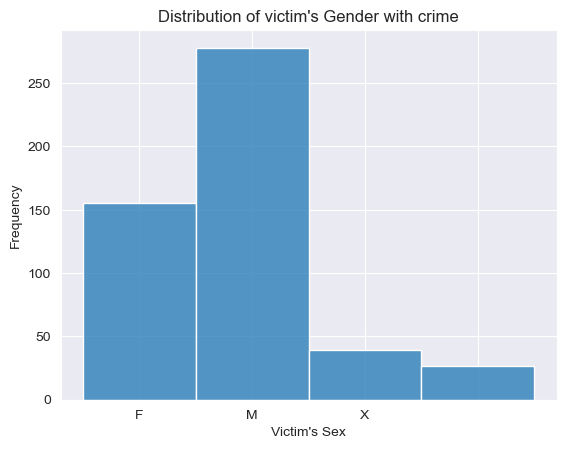

In [283]:
#plotting a histogram to show the distribbution of victim's age with crime occurences
sns.histplot(data = df['Vict_Sex'])
plt.xlabel("Victim's Sex")
plt.ylabel("Frequency")
plt.title("Distribution of victim's Gender with crime")
plt.show()

In [284]:
#Getting the exact number of victims in each gender
df['Vict_Sex'].value_counts()

Vict_Sex
M    278
F    155
X     39
      27
Name: count, dtype: int64

In [187]:
#Retreiving the crime premises with maximum counts
df['Premis_Desc'].value_counts().head(15)

Premis_Desc
STREET                                          105
SIDEWALK                                         62
PARKING LOT                                      46
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     45
SINGLE FAMILY DWELLING                           25
VEHICLE, PASSENGER/TRUCK                         21
OTHER BUSINESS                                   19
DEPARTMENT STORE                                 17
OTHER STORE                                      14
LA UNION STATION (NOT LINE SPECIFIC)             13
RESTAURANT/FAST FOOD                             12
PARKING UNDERGROUND/BUILDING                     10
NIGHT CLUB (OPEN EVENINGS ONLY)                   9
GARAGE/CARPORT                                    6
STAPLES CENTER *                                  6
Name: count, dtype: int64

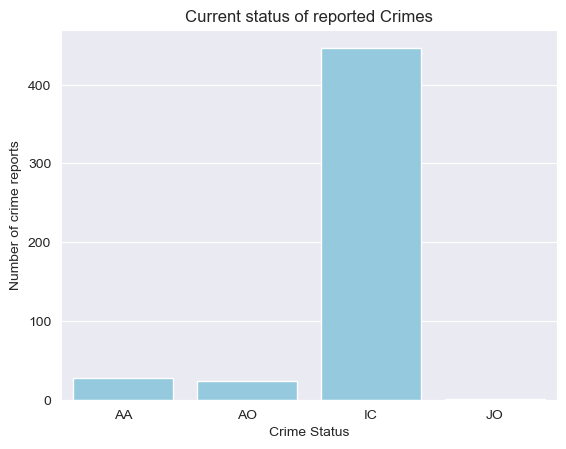

In [255]:
#Current status of reported crimes
df['Status'].value_counts()
s = df.groupby('Status').count()
s.reset_index(inplace = True)
sns.barplot(x = s['Status'], y = s['DR_NO'], color = 'skyblue')
plt.xlabel("Crime Status")
plt.ylabel("Number of crime reports")
plt.title("Current status of reported Crimes")
plt.show()




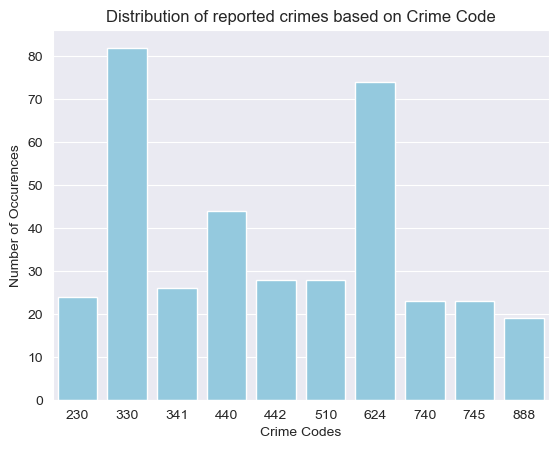

In [257]:
#Distribution of reported crimes based on Crime Code
crime_by_crimecode = df.groupby('Crm_Cd').count().sort_values(by = 'DR_NO', ascending = False)
crime_by_crimecode.reset_index(inplace = True)
z = crime_by_crimecode.head(10)
sns.barplot(x= z['Crm_Cd'], y = z['DR_NO'], color = 'skyblue')
plt.xlabel("Crime Codes")
plt.ylabel("Number of Occurences")
plt.title("Distribution of reported crimes based on Crime Code")
plt.show()

In [261]:
#Finding the total number of crimes in each geographical location.
df['Location'].value_counts()

Location
800 N ALAMEDA ST      14
700 W 7TH ST          11
1100 S FIGUEROA ST     6
300 E 5TH ST           6
6TH                    6
                      ..
14600 VANOWEN ST       1
600 N ALAMEDA ST       1
FLOWER                 1
400 COLYTON ST         1
2600 S FIGUEROA ST     1
Name: count, Length: 365, dtype: int64